# 서현님 "R" 확인 결과: 층, 건축년도 / 매칭구~ (거래금액, 전용면적 데이터는 버리기!)
'층', '건축년도'

In [33]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [34]:
data = pd.read_csv("./Raemian_final.csv")

In [35]:
data

,계약년월,층,건축년도,매칭 구,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),...,경제활동인구_고용률(단위: %),경제활동인구_취업자(단위: 천명),국제 주요국 주가지수(KOSPI),예금은행 대출금리(신규취급액 기준)_대출평균(연%),예금은행 대출금리(잔액 기준)_총대출(연리%),주택매매가격지수(KB)_서울,소비자물가지수_총지수(가중치:1000?),"원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원",경기종합지수,평당가
0,202101,7,2020,강남구,"10,589,107","6,436,523",97.0,"5,762","3,550","25,979.03",...,57.4,"25,818","2,976.21",2.72,2.80,89.828,101.04,"1,099.03",103.8,10848.124830
1,202105,18,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71",...,61.2,"27,550","3,203.92",2.72,2.78,93.144,102.05,"1,123.39",106.3,10951.290050
2,202105,7,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71",...,61.2,"27,550","3,203.92",2.72,2.78,93.144,102.05,"1,123.39",106.3,11919.951920
3,202105,18,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71",...,61.2,"27,550","3,203.92",2.72,2.78,93.144,102.05,"1,123.39",106.3,10951.290050
4,202105,7,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71",...,61.2,"27,550","3,203.92",2.72,2.78,93.144,102.05,"1,123.39",106.3,11919.951920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7857,202011,5,2011,중구,"13,510,590","8,663,124",96.4,"9,619","5,807","26,045.45",...,60.7,"27,241","2,591.34",2.71,2.81,87.613,100.09,"1,115.20",102.6,5754.991630
7858,202012,5,2011,중구,"22,231,493","15,138,239",96.6,"12,063","6,694","34,654.82",...,59.1,"26,526","2,873.47",2.74,2.80,88.701,100.33,"1,094.50",103.1,5644.318714
7859,202012,13,2011,중구,"22,231,493","15,138,239",96.6,"12,063","6,694","34,654.82",...,59.1,"26,526","2,873.47",2.74,2.80,88.701,100.33,"1,094.50",103.1,5865.664546
7860,202012,2,2011,중구,"22,231,493","15,138,239",96.6,"12,063","6,694","34,654.82",...,59.1,"26,526","2,873.47",2.74,2.80,88.701,100.33,"1,094.50",103.1,4979.317486


In [36]:
print(data["매칭 구"].unique())

['강남구' '강동구' '강북구' '광진구' '구로구' '노원구' '동대문구' '동작구' '마포구' '서대문구' '서초구' '성동구'
 '성북구' '송파구' '영등포구' '용산구' '은평구' '중구']


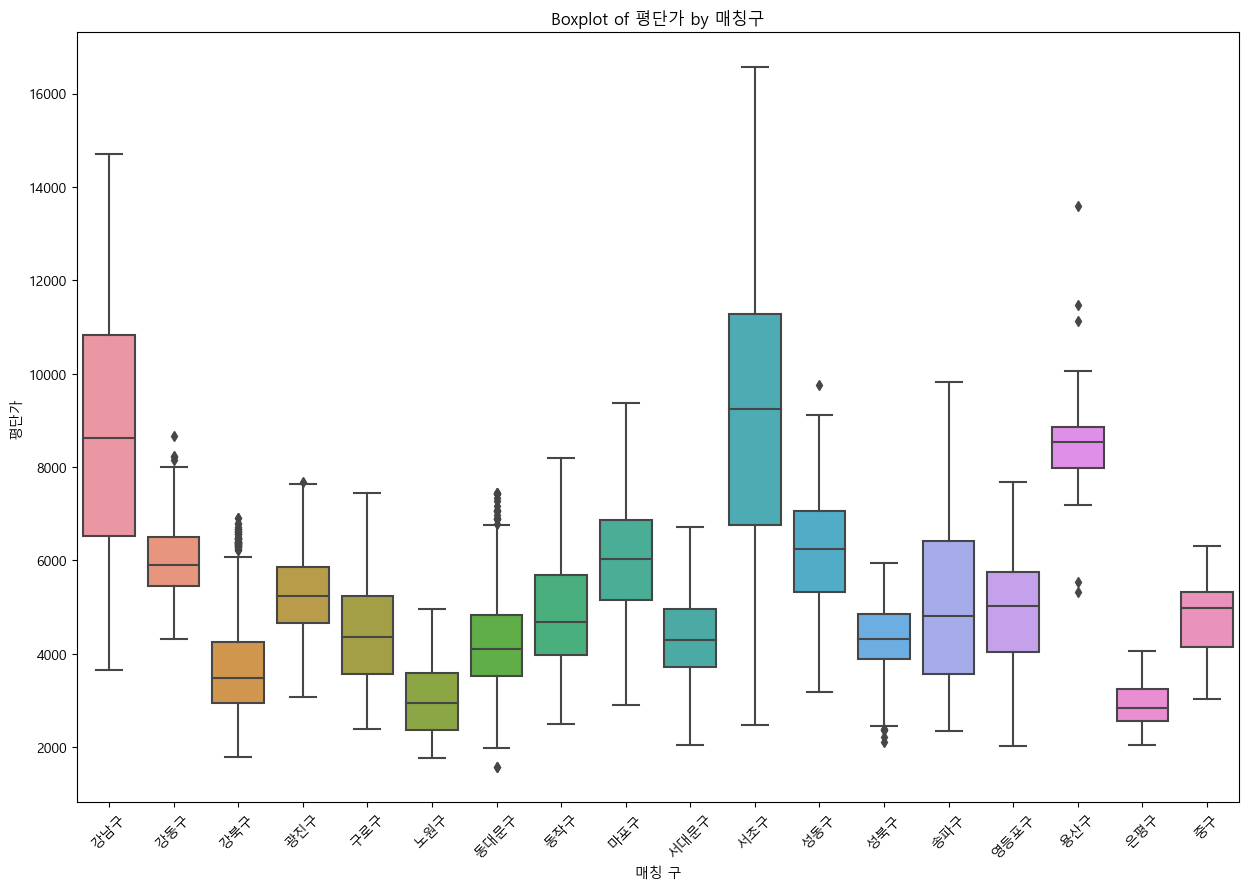

매칭 구
강남구     8658.911005
강동구     6005.907745
강북구     3562.073346
광진구     5321.733021
구로구     4464.987213
노원구     3033.482260
동대문구    4204.090054
동작구     4891.786525
마포구     6005.751022
서대문구    4362.195998
서초구     8818.153835
성동구     6215.664085
성북구     4341.273631
송파구     5047.022322
영등포구    4966.980515
용산구     8496.882525
은평구     2919.692198
중구      4784.369367
Name: 평당가, dtype: float64

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converting '평단가' to numeric (as it seems to be a string)
data['평당가'] = pd.to_numeric(data['평당가'], errors='coerce')

# Grouping data by '매칭구'
grouped_data = data.groupby('매칭 구')

# Creating boxplots for each group's '평단가' to visualize outliers
plt.figure(figsize=(15,10))
sns.boxplot(x='매칭 구', y='평당가', data=data)
plt.xticks(rotation=45)
plt.title('Boxplot of 평단가 by 매칭구')
plt.ylabel('평단가')
plt.xlabel('매칭 구')
plt.show()

# Identifying and removing outliers for each group in '평단가'
# Using IQR (Interquartile Range) method
cleaned_data = pd.DataFrame()
for name, group in grouped_data:
    Q1 = group['평당가'].quantile(0.25)
    Q3 = group['평당가'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_group = group[(group['평당가'] >= lower_bound) & (group['평당가'] <= upper_bound)]
    cleaned_data = pd.concat([cleaned_data, filtered_group], axis=0)

# Calculating the mean of '평단가' for each group in the cleaned data
mean_prices = cleaned_data.groupby('매칭 구')['평당가'].mean()
mean_prices


##이상치를 제거한, 0.25~0.75만 확인해보기!

하위 25% :  6517.92720075
상위 25% :  10824.3451625
강남구 평균 평당가:  8658.911005055394
강남구 전체 개수 : 686
강남구 필터링 개수 686
이상치 개수(제거) : 0


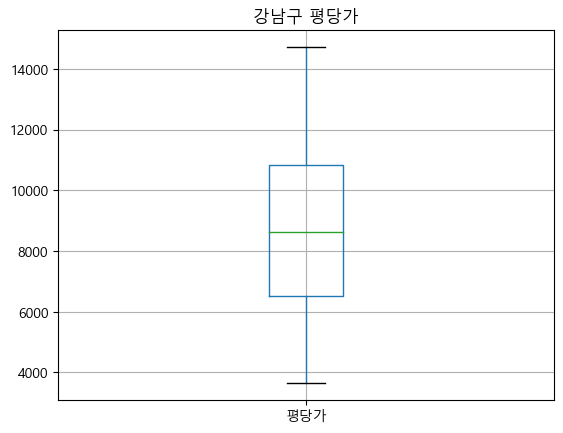

하위 25% :  5451.260306
상위 25% :  6507.884414749999
강동구 평균 평당가:  6029.249415866162
강동구 전체 개수 : 396
강동구 필터링 개수 392
이상치 개수(제거) : 4


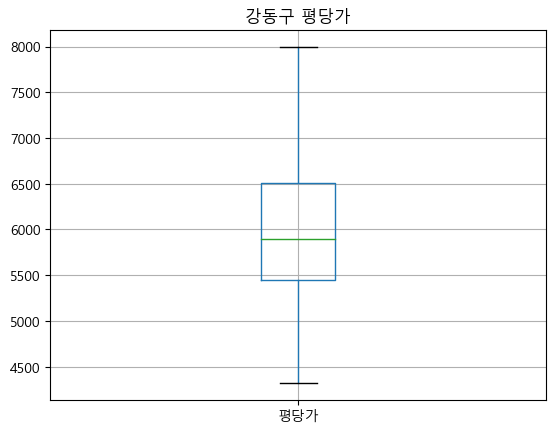

하위 25% :  2937.9651565000004
상위 25% :  4250.179131
강북구 평균 평당가:  3728.389937402187
강북구 전체 개수 : 823
강북구 필터링 개수 776
이상치 개수(제거) : 47


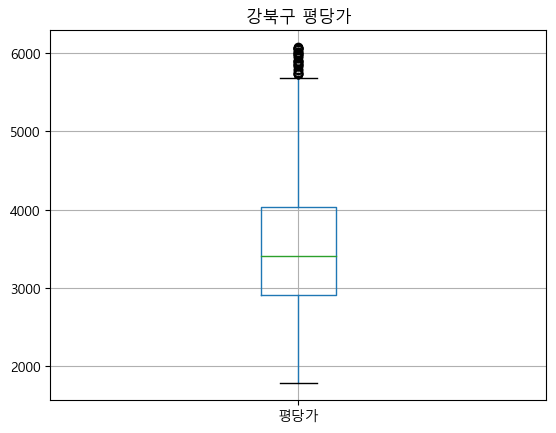

하위 25% :  4653.79530675
상위 25% :  5867.68963775
광진구 평균 평당가:  5329.0833775465835
광진구 전체 개수 : 322
광진구 필터링 개수 321
이상치 개수(제거) : 1


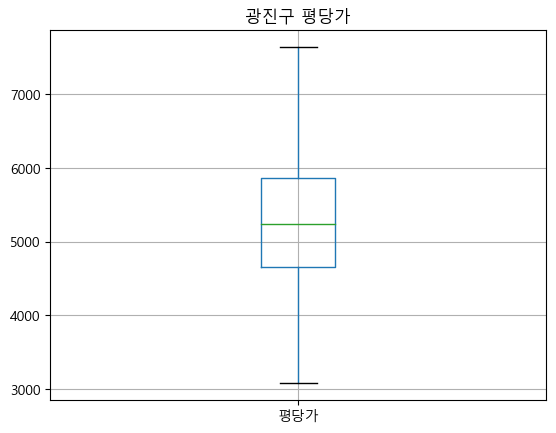

하위 25% :  3572.020594
상위 25% :  5241.171562
구로구 평균 평당가:  4464.9872128113875
구로구 전체 개수 : 281
구로구 필터링 개수 281
이상치 개수(제거) : 0


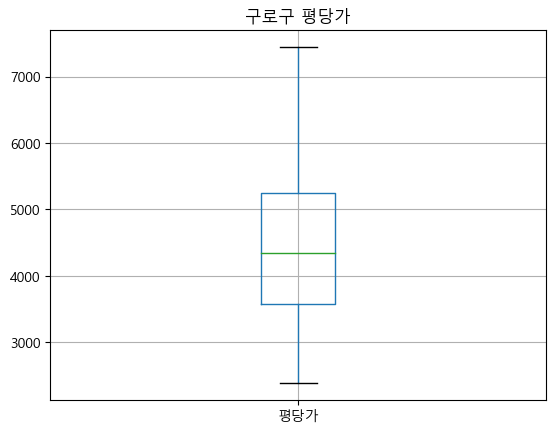

하위 25% :  2359.670048
상위 25% :  3586.9751029999998
노원구 평균 평당가:  3033.4822598740743
노원구 전체 개수 : 135
노원구 필터링 개수 135
이상치 개수(제거) : 0


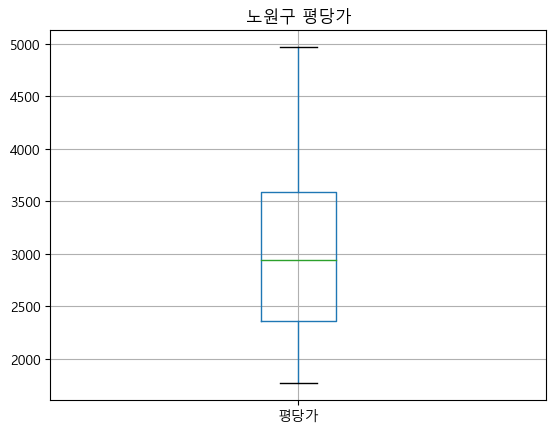

하위 25% :  3534.0796527499997
상위 25% :  4829.16508775
동대문구 평균 평당가:  4262.0841339182925
동대문구 전체 개수 : 820
동대문구 필터링 개수 800
이상치 개수(제거) : 20


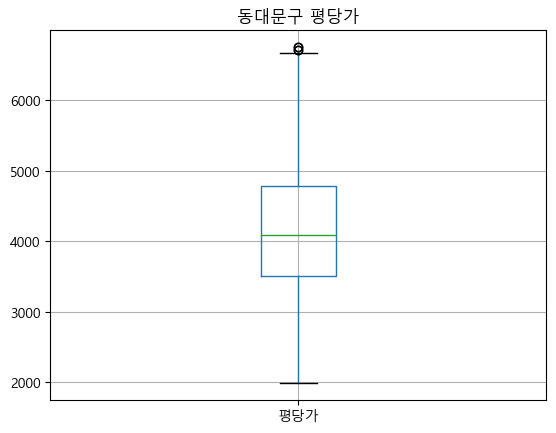

하위 25% :  3982.771034
상위 25% :  5679.534008
동작구 평균 평당가:  4891.7865245250605
동작구 전체 개수 : 419
동작구 필터링 개수 419
이상치 개수(제거) : 0


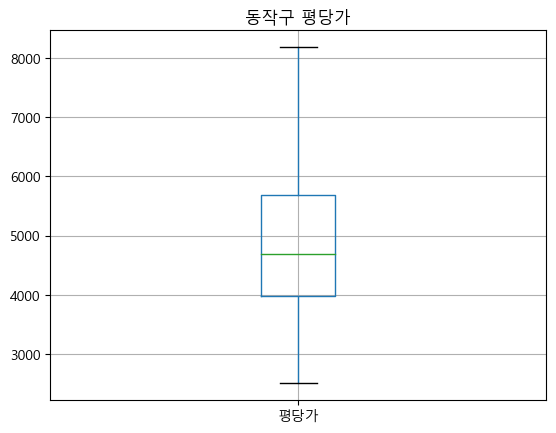

하위 25% :  5155.83275125
상위 25% :  6855.4723875
마포구 평균 평당가:  6005.751022465454
마포구 전체 개수 : 1100
마포구 필터링 개수 1100
이상치 개수(제거) : 0


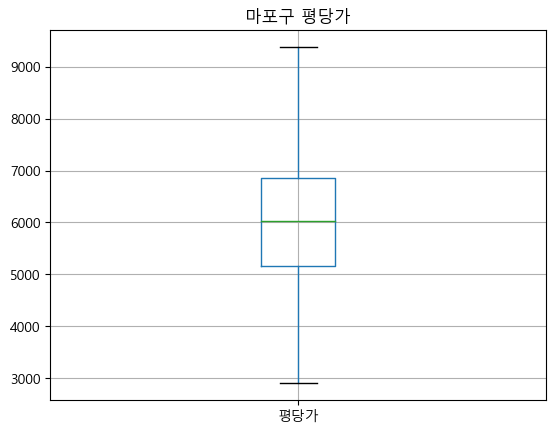

하위 25% :  3723.36893
상위 25% :  4966.69217925
서대문구 평균 평당가:  4362.195997739584
서대문구 전체 개수 : 576
서대문구 필터링 개수 576
이상치 개수(제거) : 0


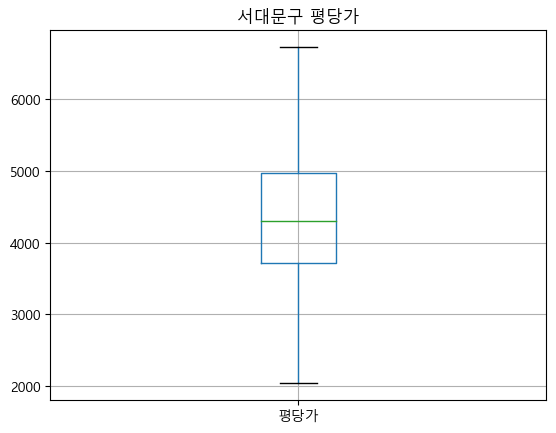

하위 25% :  6763.06654625
상위 25% :  11268.562334999999
서초구 평균 평당가:  8818.153835286475
서초구 전체 개수 : 562
서초구 필터링 개수 562
이상치 개수(제거) : 0


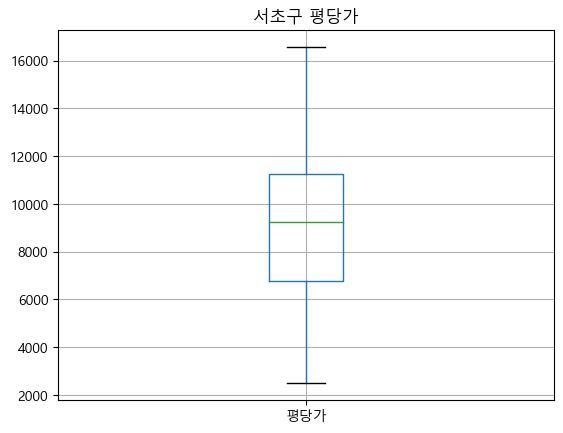

하위 25% :  5323.727649
상위 25% :  7053.548925
성동구 평균 평당가:  6231.158854445415
성동구 전체 개수 : 229
성동구 필터링 개수 228
이상치 개수(제거) : 1


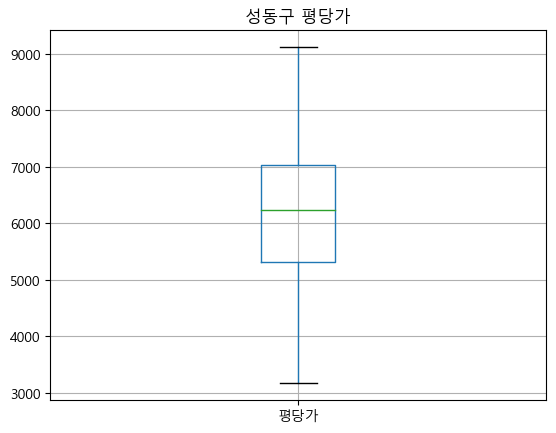

하위 25% :  3877.942702
상위 25% :  4855.790352
성북구 평균 평당가:  4327.059016445215
성북구 전체 개수 : 721
성북구 필터링 개수 716
이상치 개수(제거) : 5


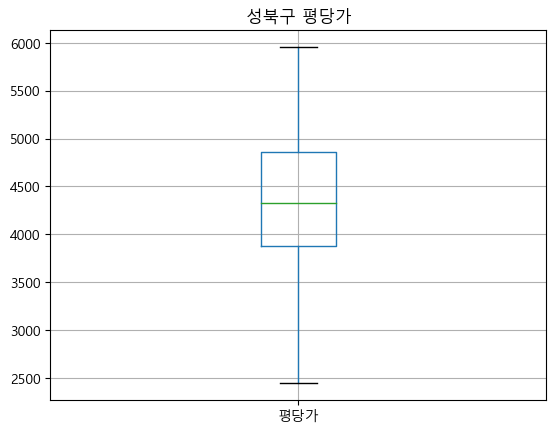

하위 25% :  3569.255685
상위 25% :  6425.230734
송파구 평균 평당가:  5047.022322
송파구 전체 개수 : 261
송파구 필터링 개수 261
이상치 개수(제거) : 0


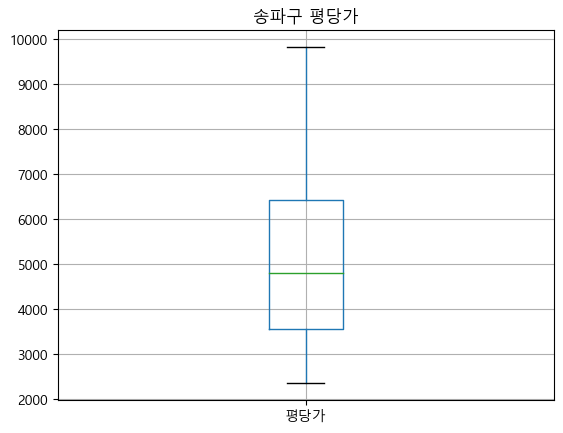

하위 25% :  4037.046456
상위 25% :  5761.234081250001
영등포구 평균 평당가:  4966.980515051813
영등포구 전체 개수 : 386
영등포구 필터링 개수 386
이상치 개수(제거) : 0


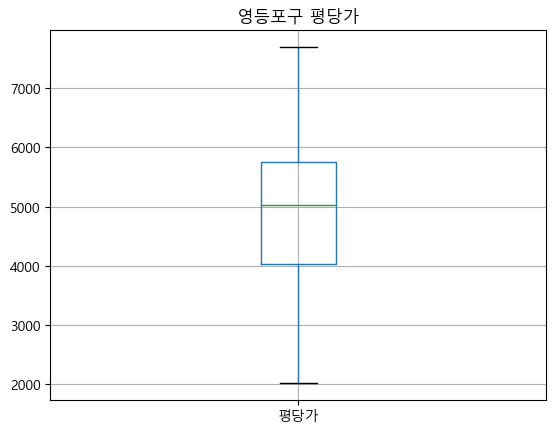

하위 25% :  7973.8520545
상위 25% :  8852.631994
용산구 평균 평당가:  8610.638916925
용산구 전체 개수 : 40
용산구 필터링 개수 35
이상치 개수(제거) : 5


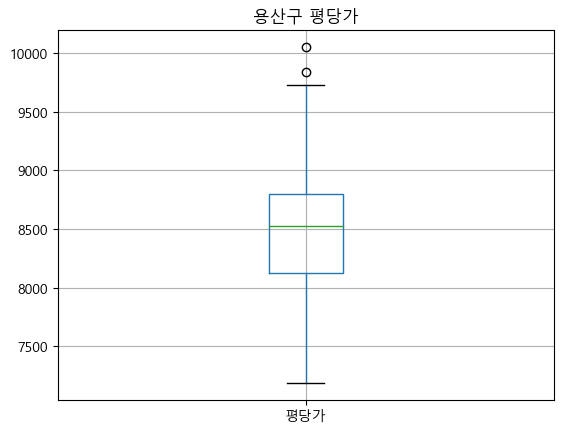

하위 25% :  2565.15950775
상위 25% :  3248.716113
은평구 평균 평당가:  2919.6921983947364
은평구 전체 개수 : 38
은평구 필터링 개수 38
이상치 개수(제거) : 0


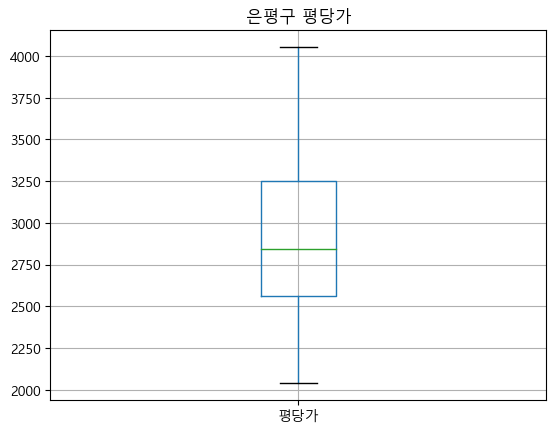

하위 25% :  nan
상위 25% :  nan
양천구 평균 평당가:  nan
양천구 전체 개수 : 0
양천구 필터링 개수 0
이상치 개수(제거) : 0


C:\Users\vivid\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


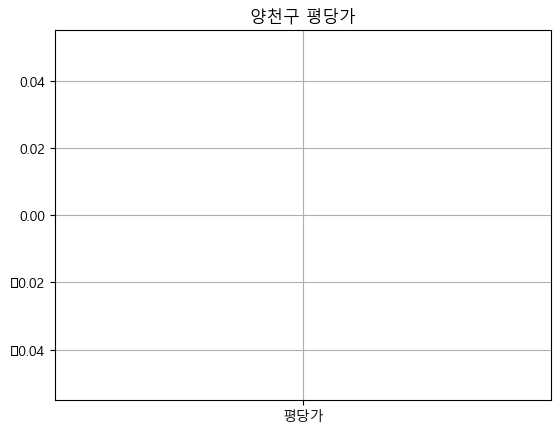

하위 25% :  4139.5447805
상위 25% :  5329.425747
중구 평균 평당가:  4784.369367253731
중구 전체 개수 : 67
중구 필터링 개수 67
이상치 개수(제거) : 0


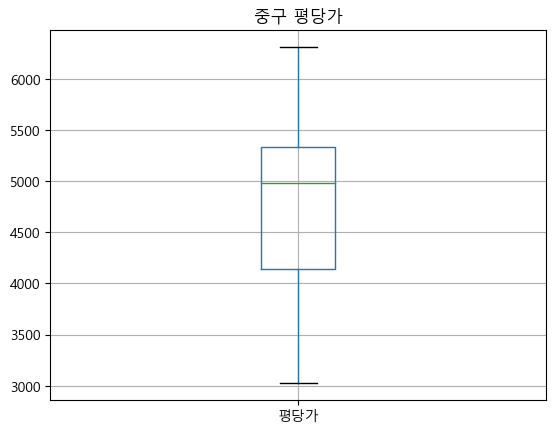

---------------------------------------
전체 시각화


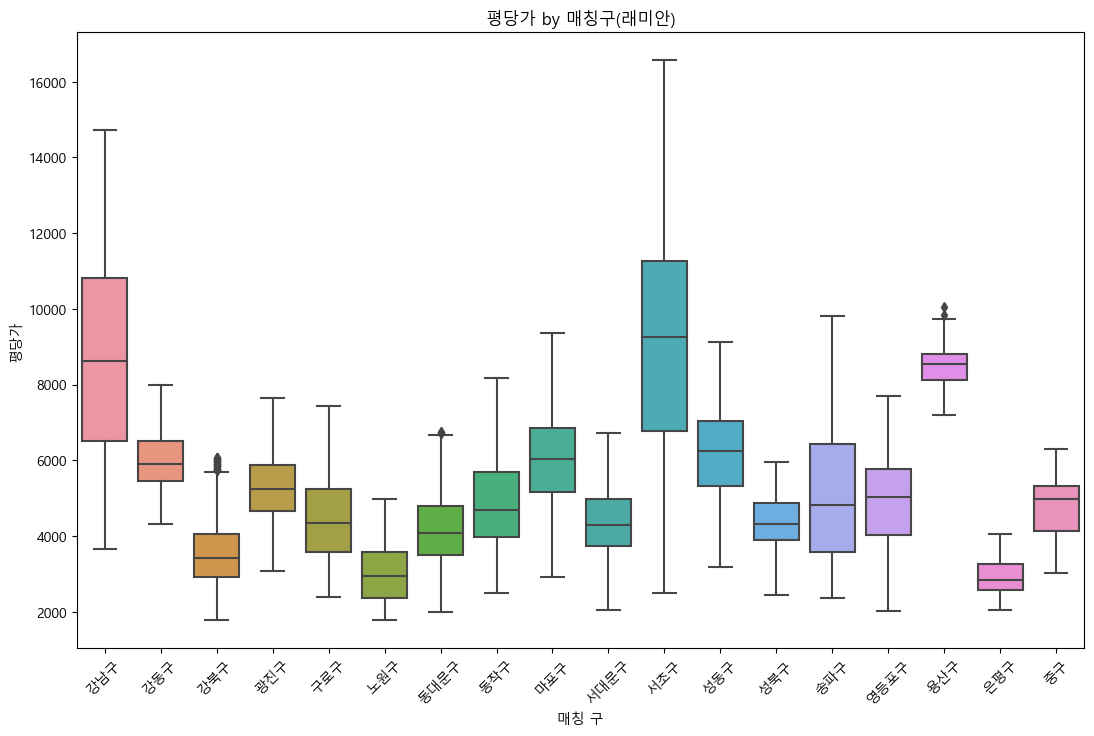

In [38]:
'''
매칭구, 각 구별 총 개수, 각 구별 이상치 개수, 각 구별 시각화, 각 구별 평단가, 전체 시각화
'''
filtered_data_total = pd.DataFrame()
def visualize(data, group):
    data = data[data['매칭 구'] == group]
    # low_limit = data["평당가"].quantile(0.25)
    # upper_limit = data['평당가'].quantile(0.75)

    Q1 = data["평당가"].quantile(0.25)
    Q3 = data["평당가"].quantile(0.75)
    IQR = Q3 - Q1
    

    # filtered_data = data[(data["평당가"] >= low_limit) & (data["평당가"] <= upper_limit)] #형준 수식(무작정 지우는 것)
    filtered_data = data[~((data['평당가'] < (Q1 - 1.5 * IQR)) | (data['평당가'] > (Q3 + 1.5 * IQR)))] #희진 수식
    #튀어나오는 값 있지만, 정상 범위내에 있다고 판단.
    global filtered_data_total
    filtered_data_total = pd.concat([filtered_data_total, filtered_data], ignore_index=True)
    
    outliers_count = len(data) - len(filtered_data)

    filtered_data_total.append(data, ignore_index=True)
    
    print("하위 25% : ", Q1)
    print("상위 25% : ", Q3)
    print(f"{group} 평균 평당가: ", data['평당가'].mean())
    print(f"{group} 전체 개수 :", len(data))
    print(f"{group} 필터링 개수", len(filtered_data))
    print("이상치 개수(제거) :", outliers_count) #이미 정수 개수




    #개별 box plot 그리기
    filtered_data.boxplot(column = "평당가")
    plt.title(f"{group} 평당가") #0.25~0.75% 사이 1차 필터링
    plt.show()

group = ['강남구', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '영등포구', '용산구', '은평구', '양천구', '중구']

for i in group:
    visualize(data, i)

print("---------------------------------------")
print("전체 시각화")


plt.figure(figsize=(13,8))
sns.boxplot(x="매칭 구", y="평당가", data=filtered_data_total)
plt.xticks(rotation = 45)
plt.title("평당가 by 매칭구(래미안)")
plt.ylabel("평당가")
plt.xlabel("매칭 구")
plt.show()



#데이터 문제 없이 이상치 제거

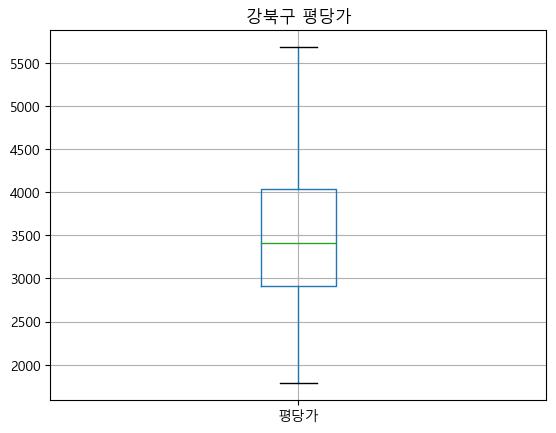

In [39]:

group_data = filtered_data_total[filtered_data_total["매칭 구"] == "강북구"]

group_data.boxplot(column = "평당가", showfliers=False)
plt.title("강북구 평당가")
plt.show()

# group_data.to_csv("./강북구.csv")

##filtered_data_total = data로 다시 수정해주기

In [40]:
data = filtered_data_total

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   계약년월                                7779 non-null   int64  
 1   층                                   7779 non-null   int64  
 2   건축년도                                7779 non-null   int64  
 3   매칭 구                                7779 non-null   object 
 4   건설수주_건축(단위 백만원)                     7779 non-null   object 
 5   건설수주_주택(단위 백만원)                     7779 non-null   object 
 6   매매가격지수(아파트)                         7779 non-null   float64
 7   경상수지(백만불)                           7779 non-null   object 
 8   무역수지(백만불)                           7779 non-null   object 
 9   대출금액(아파트)(억원)                       7779 non-null   object 
 10  대출잔액(아파트)(억원)                       7779 non-null   object 
 11  서울_신규_분양세대(단위: 세대)                  7779 no

In [42]:
# object -> float 형으로 데이터타입 변환
# transaction_fee = data['거래금액(만원)']
CO_architecture = data['건설수주_건축(단위 백만원)']
CO_dwellinghouse = data['건설수주_주택(단위 백만원)']
current_balance = data['경상수지(백만불)']
trade_balance = data['무역수지(백만불)']
loan_amount = data['대출금액(아파트)(억원)']
loan_balance = data['대출잔액(아파트)(억원)']
Newly_Offered_Housing_Units_in_Seoul = data['서울_신규_분양세대(단위: 세대)']
employed_person = data['경제활동인구_취업자(단위: 천명)']
KOSPI = data['국제 주요국 주가지수(KOSPI)']
KRW_to_USD = data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원']

# transaction_fee_comma_removed = transaction_fee.apply(lambda x: x.replace(',', ''))
# data['거래금액(만원)'] = transaction_fee_comma_removed.astype(float)
CO_architecture_comma_removed = CO_architecture.apply(lambda x: x.replace(',', ''))
data['건설수주_건축(단위 백만원)'] = CO_architecture_comma_removed.astype(float)
CO_dwellinghouse_comma_removed = CO_dwellinghouse.apply(lambda x: x.replace(',', ''))
data['건설수주_주택(단위 백만원)'] = CO_dwellinghouse_comma_removed.astype(float)
current_balance_comma_removed = current_balance.apply(lambda x: x.replace(',', ''))
data['경상수지(백만불)'] = current_balance_comma_removed.astype(float)
trade_balance_comma_removed = trade_balance.apply(lambda x: x.replace(',', ''))
data['무역수지(백만불)'] = trade_balance_comma_removed.astype(float)
loan_amount_comma_removed = loan_amount.apply(lambda x: x.replace(',', ''))
data['대출금액(아파트)(억원)'] = loan_amount_comma_removed.astype(float)
loan_balance_comma_removed = loan_balance.apply(lambda x: x.replace(',', ''))
data['대출잔액(아파트)(억원)'] = loan_balance_comma_removed.astype(float)
Newly_Offered_Housing_Units_in_Seoul_comma_removed = Newly_Offered_Housing_Units_in_Seoul.apply(lambda x: x.replace(',', ''))
data['서울_신규_분양세대(단위: 세대)'] = Newly_Offered_Housing_Units_in_Seoul_comma_removed.astype(float)
employed_person_comma_removed = employed_person.apply(lambda x: x.replace(',', ''))
data['경제활동인구_취업자(단위: 천명)'] = employed_person_comma_removed.astype(float)
KOSPI_comma_removed = KOSPI.apply(lambda x: x.replace(',', ''))
data['국제 주요국 주가지수(KOSPI)'] = KOSPI_comma_removed.astype(float)
KRW_to_USD_comma_removed = KRW_to_USD.apply(lambda x: x.replace(',', ''))
data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원'] = KRW_to_USD_comma_removed.astype(float)

# 데이터 정리는 완료함!
-target encoding 진행하기 위해서 train, test를 나눠서 진행해야함

# 아파트 건물면적 106개 빈 값 제거

In [43]:
data = data.dropna(subset=["아파트 건물면적_(천)"])

In [44]:
data.info() #매칭구를 제외하고는 데이터가 문제 없음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7673 entries, 0 to 7778
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   계약년월                                7673 non-null   int64  
 1   층                                   7673 non-null   int64  
 2   건축년도                                7673 non-null   int64  
 3   매칭 구                                7673 non-null   object 
 4   건설수주_건축(단위 백만원)                     7673 non-null   float64
 5   건설수주_주택(단위 백만원)                     7673 non-null   float64
 6   매매가격지수(아파트)                         7673 non-null   float64
 7   경상수지(백만불)                           7673 non-null   float64
 8   무역수지(백만불)                           7673 non-null   float64
 9   대출금액(아파트)(억원)                       7673 non-null   float64
 10  대출잔액(아파트)(억원)                       7673 non-null   float64
 11  서울_신규_분양세대(단위: 세대)                  7673 no

train(X)값과 target(y)값 나눠주기

In [45]:
train = data.iloc[:, :41]
target = data.iloc[:, -1]

In [46]:
train

,계약년월,층,건축년도,매칭 구,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),...,경제활동인구_고용률(단위: %),경제활동인구_취업자(단위: 천명),국제 주요국 주가지수(KOSPI),예금은행 대출금리(신규취급액 기준)_대출평균(연%),예금은행 대출금리(잔액 기준)_총대출(연리%),주택매매가격지수(KB)_서울,소비자물가지수_총지수(가중치:1000?),"원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원",경기종합지수,평당가
0,202101,7,2020,강남구,10589107.0,6436523.0,97.0,5762.0,3550.0,25979.03,...,57.4,25818.0,2976.21,2.72,2.80,89.828,101.04,1099.03,103.8,10848.124830
1,202105,18,2020,강남구,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,...,61.2,27550.0,3203.92,2.72,2.78,93.144,102.05,1123.39,106.3,10951.290050
2,202105,7,2020,강남구,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,...,61.2,27550.0,3203.92,2.72,2.78,93.144,102.05,1123.39,106.3,11919.951920
3,202105,18,2020,강남구,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,...,61.2,27550.0,3203.92,2.72,2.78,93.144,102.05,1123.39,106.3,10951.290050
4,202105,7,2020,강남구,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,...,61.2,27550.0,3203.92,2.72,2.78,93.144,102.05,1123.39,106.3,11919.951920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7774,202011,5,2011,중구,13510590.0,8663124.0,96.4,9619.0,5807.0,26045.45,...,60.7,27241.0,2591.34,2.71,2.81,87.613,100.09,1115.20,102.6,5754.991630
7775,202012,5,2011,중구,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.82,...,59.1,26526.0,2873.47,2.74,2.80,88.701,100.33,1094.50,103.1,5644.318714
7776,202012,13,2011,중구,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.82,...,59.1,26526.0,2873.47,2.74,2.80,88.701,100.33,1094.50,103.1,5865.664546
7777,202012,2,2011,중구,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.82,...,59.1,26526.0,2873.47,2.74,2.80,88.701,100.33,1094.50,103.1,4979.317486


In [47]:
target

0       10848.124830
1       10951.290050
2       11919.951920
3       10951.290050
4       11919.951920
            ...     
7774     5754.991630
7775     5644.318714
7776     5865.664546
7777     4979.317486
7778     4921.545251
Name: 평당가, Length: 7673, dtype: float64

train, target 문제없이 바뀜

# 매칭 구 -> Target Encoding 진행하기

In [48]:
#먼저 데이터 나눠주기
#모델 import
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error, r2_score


In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

#train 0.6 / val 0.2 / test 0.2
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(4603, 31) (1535, 31) (1535, 31) (4603,) (1535,) (1535,)


In [50]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder

categorical_features = list(X_train.dtypes[X_train.dtypes == "object"].index) #object값 list에 넣음
categorical_features.append('계약년월')
# 추출된 문자열 변수 확인
display(categorical_features) #Target encoding 할 값 추출

for i in categorical_features: #인코딩 적용한 값 반환
    le = TargetEncoder(cols=[i])
    X_train[i] = le.fit_transform(X_train[i], y_train)
    X_val[i] = le.transform(X_val[i], y_val)
    X_test[i] = le.transform(X_test[i])
#target encdoer 주의사항: train은 fit_transform인 반면, test는 transform만 진행!

    
display(X_train)
display(X_test)

['매칭 구', '계약년월']

,계약년월,층,건축년도,매칭 구,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),...,경제활동인구_고용률(단위: %),경제활동인구_취업자(단위: 천명),국제 주요국 주가지수(KOSPI),예금은행 대출금리(신규취급액 기준)_대출평균(연%),예금은행 대출금리(잔액 기준)_총대출(연리%),주택매매가격지수(KB)_서울,소비자물가지수_총지수(가중치:1000?),"원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원",경기종합지수,평당가
3828,6165.423310,2,1999,6045.277841,10252826.0,6957382.0,100.8,7387.0,1786.0,19292.07,...,61.3,27648.0,3202.32,2.77,2.77,95.029,102.26,1145.14,107.1,6363.692668
2425,5627.291675,14,2015,4485.942197,10094921.0,6809825.0,96.2,12057.0,5725.0,24492.21,...,60.4,27088.0,2267.15,2.66,2.83,86.178,100.18,1141.93,101.8,6392.278713
1261,6498.342648,5,2006,3522.498210,12260118.0,7540232.0,102.7,9510.0,4278.0,19440.64,...,61.3,27683.0,3068.82,2.96,2.83,97.624,103.17,1170.43,107.1,4923.790876
4922,5933.813162,18,2000,4409.440578,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,...,61.2,27550.0,3203.92,2.72,2.78,93.144,102.05,1123.39,106.3,4848.580634
3823,6312.663552,1,1999,6045.277841,15448828.0,8843858.0,100.0,9972.0,4350.0,18224.72,...,61.3,27637.0,3296.68,2.77,2.77,94.084,102.05,1121.99,106.9,6031.673920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3391,5742.116232,18,2011,4844.709290,10589107.0,6436523.0,97.0,5762.0,3550.0,25979.03,...,57.4,25818.0,2976.21,2.72,2.80,89.828,101.04,1099.03,103.8,6898.580968
2118,5428.141094,2,2014,5342.498022,11166912.0,8580561.0,95.8,6589.0,3651.0,18465.76,...,60.4,27085.0,2326.17,2.63,2.92,84.189,100.19,1186.26,100.4,4317.493823
5018,5933.813162,10,2001,4409.440578,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,...,61.2,27550.0,3203.92,2.72,2.78,93.144,102.05,1123.39,106.3,5650.940171
6639,5410.733266,7,2003,4322.164549,13510590.0,8663124.0,96.4,9619.0,5807.0,26045.45,...,60.7,27241.0,2591.34,2.71,2.81,87.613,100.09,1115.20,102.6,4656.444407


,계약년월,층,건축년도,매칭 구,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),...,경제활동인구_고용률(단위: %),경제활동인구_취업자(단위: 천명),국제 주요국 주가지수(KOSPI),예금은행 대출금리(신규취급액 기준)_대출평균(연%),예금은행 대출금리(잔액 기준)_총대출(연리%),주택매매가격지수(KB)_서울,소비자물가지수_총지수(가중치:1000?),"원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원",경기종합지수,평당가
7250,5410.733266,8,2001,5161.478272,13510590.0,8663124.0,96.4,9619.0,5807.0,26045.45,...,60.7,27241.0,2591.34,2.71,2.81,87.613,100.09,1115.20,102.6,5972.838143
3386,5410.733266,9,2004,4223.865361,13510590.0,8663124.0,96.4,9619.0,5807.0,26045.45,...,60.7,27241.0,2591.34,2.71,2.81,87.613,100.09,1115.20,102.6,4171.512919
5814,5428.141094,13,2009,8452.238490,11166912.0,8580561.0,95.8,6589.0,3651.0,18465.76,...,60.4,27085.0,2326.17,2.63,2.92,84.189,100.19,1186.26,100.4,8428.662911
6048,5742.116232,12,2001,6314.988884,10589107.0,6436523.0,97.0,5762.0,3550.0,25979.03,...,57.4,25818.0,2976.21,2.72,2.80,89.828,101.04,1099.03,103.8,4814.841918
1758,4911.250901,6,2011,3522.498210,16637293.0,10008122.0,94.3,7039.0,3419.0,18057.24,...,60.4,27055.0,2108.33,2.72,3.05,81.755,99.71,1207.83,99.0,3722.126772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,5717.118674,16,2020,3522.498210,13259062.0,6936574.0,98.1,6689.0,3948.0,27308.99,...,59.8,26923.0,3061.42,2.77,2.80,91.732,101.84,1131.06,104.9,4858.603028
2621,5717.118674,5,2004,4223.865361,13259062.0,6936574.0,98.1,6689.0,3948.0,27308.99,...,59.8,26923.0,3061.42,2.77,2.80,91.732,101.84,1131.06,104.9,4423.214584
2985,4656.678177,9,2007,4223.865361,10945748.0,8624217.0,94.1,1942.0,193.0,18127.48,...,60.2,26930.0,2029.60,2.82,3.14,81.326,99.44,1230.06,98.5,3140.611968
3716,4911.250901,13,2004,4844.709290,16637293.0,10008122.0,94.3,7039.0,3419.0,18057.24,...,60.4,27055.0,2108.33,2.72,3.05,81.755,99.71,1207.83,99.0,4350.146422


In [51]:
X_train = X_train[["층", "건축년도", "매칭 구"]]
X_val = X_val[["층", "건축년도", "매칭 구"]]
X_test = X_test[["층", "건축년도", "매칭 구"]]

In [52]:
X_train

,층,건축년도,매칭 구
3828,2,1999,6045.277841
2425,14,2015,4485.942197
1261,5,2006,3522.498210
4922,18,2000,4409.440578
3823,1,1999,6045.277841
...,...,...,...
3391,18,2011,4844.709290
2118,2,2014,5342.498022
5018,10,2001,4409.440578
6639,7,2003,4322.164549


In [53]:
X_test

,층,건축년도,매칭 구
7250,8,2001,5161.478272
3386,9,2004,4223.865361
5814,13,2009,8452.238490
6048,12,2001,6314.988884
1758,6,2011,3522.498210
...,...,...,...
1219,16,2020,3522.498210
2621,5,2004,4223.865361
2985,9,2007,4223.865361
3716,13,2004,4844.709290


# 정규화

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #
X_train_scaler = scaler.fit_transform(X_train)
X_val_scaler = scaler.fit_transform(X_val)
X_test_scaler = scaler.fit_transform(X_test)


In [55]:
X_train_scaler

array([[-1.30620042, -1.48375731,  0.42079799],
       [ 0.44389142,  0.94426914, -0.57674097],
       [-0.86867746, -0.42149574, -1.19307584],
       ...,
       [-0.13947252, -1.180254  , -0.62568063],
       [-0.57699548, -0.8767507 , -0.68151289],
       [ 1.02725537,  0.48901418, -0.1445867 ]])

In [56]:
from tarfile import XGLTYPE
#학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression # 1. Linear Regression
from sklearn.linear_model import Lasso            # 2. Lasso
from sklearn.linear_model import Ridge            # 3. Ridge
from xgboost.sklearn import XGBRegressor          # 4. XGBoost (xgboost.sklearn으로 해야지 sklearn으로 학습 할 수 있는 라이브러리를 불러옴)
from lightgbm.sklearn import LGBMRegressor        # 5. LightGBM

#평가지표
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [57]:
#모델 훈련 함수
def train_models(X_train, y_train):
    models = {
        "LinearRegression": LinearRegression(),
        "Lasso": Lasso(),
        "Ridge": Ridge(),
        "XGBRegressor": XGBRegressor(),
        "LGBMRegressor": LGBMRegressor()
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        models[name] = model

    return models


In [58]:
#train, val 시각화 함수
def plot_mse_for_models_line(models, X_train, y_train, X_val, y_val):
    # 모델별 MSE 저장을 위한 리스트
    train_mse_list = []
    val_mse_list = []
    model_names = []

    # 각 모델별로 MSE 계산
    for name, model in models.items():
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)

        train_mse = mean_squared_error(y_train, train_pred)
        val_mse = mean_squared_error(y_val, val_pred)

        train_mse_list.append(train_mse)
        val_mse_list.append(val_mse)
        model_names.append(name)

    # 선형 그래프로 MSE 결과 시각화
    plt.figure(figsize=(10, 5))
    plt.plot(model_names, train_mse_list, marker='o', label='Training MSE')
    plt.plot(model_names, val_mse_list, marker='o', label='Validation MSE')

    plt.ylabel('MSE')
    plt.title('Training and Validation MSE for Different Models')
    plt.legend()

    plt.show()


In [59]:
#모델 test 평가 함수
def evaluate_models_on_test(models, X_test, y_test):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Test Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}\tTest MSE\t\tTest R²"
    print(header)
    print("---------------------------------------------------------")

    for name, model in models.items():
        pred_test = model.predict(X_test)

        mse_test = mean_squared_error(y_test, pred_test)
        r2_test = r2_score(y_test, pred_test)

        print(f"{name.ljust(max_name_length)}\t{mse_test:.4f}\t\t{r2_test * 100:.2f}%")

In [60]:
#모델 훈련
models = train_models(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 85
[LightGBM] [Info] Number of data points in the train set: 4603, number of used features: 3
[LightGBM] [Info] Start training from score 5387.985877


In [61]:
#모델의 훈련 및 검증과정 성능 지표 기록
def plot_training_history(models, X_train, y_train, X_val, y_val):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
    fig.suptitle('Model Training and Validation Performance')

    for name, model in models.items():
        # 모델 학습
        model.fit(X_train, y_train)

        # 성능 지표 계산
        train_mse = mean_squared_error(y_train, model.predict(X_train))
        val_mse = mean_squared_error(y_val, model.predict(X_val))
        train_r2 = r2_score(y_train, model.predict(X_train))
        val_r2 = r2_score(y_val, model.predict(X_val))

        # MSE 그래프
        axes[0].plot([1, 2], [train_mse, val_mse], marker='o', label=f'{name}')
        axes[0].set_xticks([1, 2])
        axes[0].set_xticklabels(['Train', 'Validation'])
        axes[0].set_title('Mean Squared Error (MSE)')
        axes[0].set_ylabel('MSE')
        axes[0].legend()

        # R² 그래프
        axes[1].plot([1, 2], [train_r2, val_r2], marker='o', label=f'{name}')
        axes[1].set_xticks([1, 2])
        axes[1].set_xticklabels(['Train', 'Validation'])
        axes[1].set_title('R² Score')
        axes[1].set_ylabel('R² Score')
        axes[1].legend()

    plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 85
[LightGBM] [Info] Number of data points in the train set: 4603, number of used features: 3
[LightGBM] [Info] Start training from score 5387.985877


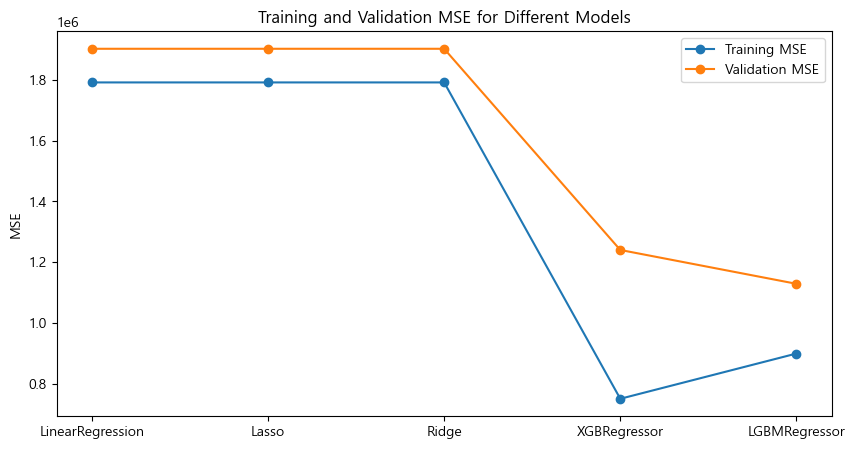

In [62]:
#결과 시각화
plot_mse_for_models_line(models, X_train, y_train, X_val, y_val)

In [63]:
#모델 test평가
evaluate_models_on_test(models, X_test, y_test)

Model Test Performance Evaluation:

Model            	Test MSE		Test R²
---------------------------------------------------------
LinearRegression 	1965858.7222		64.85%
Lasso            	1965854.5698		64.85%
Ridge            	1965858.6415		64.85%
XGBRegressor     	1212855.0186		78.32%
LGBMRegressor    	1144613.7182		79.54%


# xgboost early stop

[0]	validation_0-rmse:4145.17809	validation_1-rmse:4264.82009
[1]	validation_0-rmse:3007.82865	validation_1-rmse:3100.12850
[2]	validation_0-rmse:2241.84078	validation_1-rmse:2318.49445
[3]	validation_0-rmse:1737.14993	validation_1-rmse:1798.00536
[4]	validation_0-rmse:1415.59738	validation_1-rmse:1471.71172
[5]	validation_0-rmse:1222.80522	validation_1-rmse:1280.92689
[6]	validation_0-rmse:1107.93547	validation_1-rmse:1167.07478
[7]	validation_0-rmse:1045.35977	validation_1-rmse:1109.13666
[8]	validation_0-rmse:1007.68830	validation_1-rmse:1078.09703
[9]	validation_0-rmse:989.46215	validation_1-rmse:1063.26775
[10]	validation_0-rmse:978.43588	validation_1-rmse:1058.44525
[11]	validation_0-rmse:969.83750	validation_1-rmse:1057.24072
[12]	validation_0-rmse:963.61414	validation_1-rmse:1055.63460
[13]	validation_0-rmse:959.90040	validation_1-rmse:1055.92724
[14]	validation_0-rmse:953.85441	validation_1-rmse:1053.62732
[15]	validation_0-rmse:951.34107	validation_1-rmse:1055.67941
[16]	vali

c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


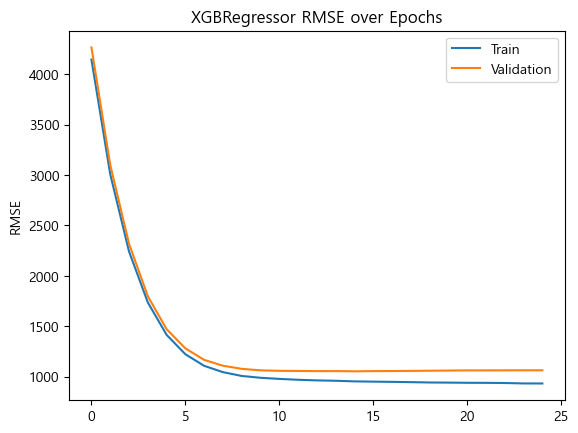

Xgboost Best Epoch:  14


In [64]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


reg_xgb = XGBRegressor()
eval_set = [(X_train, y_train), (X_val, y_val)]
reg_xgb.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set,
            early_stopping_rounds=10, verbose=True)
# Accessing the RMSE values stored during training
results = reg_xgb.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBRegressor RMSE over Epochs')
plt.show()

best_epoch = reg_xgb.best_iteration
print("Xgboost Best Epoch: ", best_epoch)

# xgboost best_iteration으로 test 진행(EPOCH 23)

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 데이터셋에 대한 예측 수행 (최적의 에포크를 사용)
pred_test = reg_xgb.predict(X_test, iteration_range=(0, best_epoch + 1))

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("XGBoost Test MSE: ", mse_test)
print("XGBoost Test R² Score: {:.2f}%".format(r2_test * 100))


XGBoost Test MSE:  1113242.010603536
XGBoost Test R² Score: 80.10%


# light gbm early stop 적용

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[47]	valid_0's rmse: 1058.99	valid_0's l2: 1.12145e+06


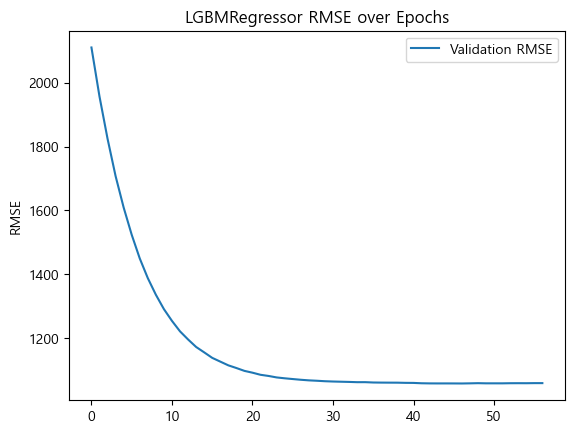

Best Iteration:  47


In [66]:
from lightgbm import LGBMRegressor, early_stopping
import matplotlib.pyplot as plt

# Initialize the model with verbosity settings
reg_lgbm = LGBMRegressor(verbose=-1)  # Set to -1 to suppress output, or a positive integer for verbosity
eval_set = [(X_val, y_val)]  # Evaluation set for early stopping

# Fit the model with early stopping
reg_lgbm.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set,
             callbacks=[early_stopping(stopping_rounds=10)])

# Accessing the RMSE values
results = reg_lgbm.evals_result_
epochs = len(results['valid_0']['rmse'])  # Adjust the key based on your evals_result structure
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['valid_0']['rmse'], label='Validation RMSE')
ax.legend()
plt.ylabel('RMSE')
plt.title('LGBMRegressor RMSE over Epochs')
plt.show()

# Best iteration
best_iteration = reg_lgbm.best_iteration_
print("Best Iteration: ", best_iteration)


# LightGBM best_iteration으로 test 진행(EPOCH 51)

In [67]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 데이터셋에 대한 예측 수행
pred_test = reg_lgbm.predict(X_test, num_iteration=best_iteration)

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("LightGBM Test MSE: ", mse_test)
print("LightGBM Test R² Score: {:.2f}%".format(r2_test * 100))


LightGBM Test MSE:  1153577.9309674357
LightGBM Test R² Score: 79.38%
